In [1]:
import pandas as pd
import numpy as np

In [2]:
hr_df = hr_df = pd.read_csv("https://raw.githubusercontent.com/Ashu8394/Class-2/main/HR_comma_sep.csv")
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
hr_df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
3890,0.42,0.56,2,103,3,1,0,0,marketing,medium
3885,0.92,0.69,4,149,6,1,0,0,RandD,medium
2699,0.30,0.86,3,276,5,1,0,0,accounting,low
10051,0.63,0.74,4,234,3,0,0,0,support,low
14746,0.37,0.56,2,156,3,0,1,0,sales,medium


In [21]:
# Extract all categorical cols 
categorical_cols = hr_df.select_dtypes('object').columns.tolist()
categorical_cols

['Department', 'salary']

In [22]:
# Extract all numeric cols
numeric_cols = hr_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department_IT',
 'Department_RandD',
 'Department_accounting',
 'Department_hr',
 'Department_management',
 'Department_marketing',
 'Department_product_mng',
 'Department_sales',
 'Department_support',
 'Department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [6]:
# Encoding categorical features using SK learn
from sklearn.preprocessing import OneHotEncoder

In [9]:
#  Create the encoder
ohe = OneHotEncoder().fit(hr_df[categorical_cols])

In [10]:
# Generate column names for each category
encoded_cols = list(ohe.get_feature_names(categorical_cols))
print('encoded columns are:'+str(encoded_cols))
print()
print('categorical columns are:'+str(categorical_cols))
print()
print('These are the categories which we are going to encode and then add it to our data'+str(ohe.categories_))

encoded columns are:['Department_IT', 'Department_RandD', 'Department_accounting', 'Department_hr', 'Department_management', 'Department_marketing', 'Department_product_mng', 'Department_sales', 'Department_support', 'Department_technical', 'salary_high', 'salary_low', 'salary_medium']

categorical columns are:['Department', 'salary']

These are the categories which we are going to encode and then add it to our data[array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object), array(['high', 'low', 'medium'], dtype=object)]


In [13]:
# Transform and add new one-hot category columns

hr_df[encoded_cols] = ohe.transform(hr_df[categorical_cols]).toarray()

hr_df1 = hr_df[encoded_cols+numeric_cols]

In [23]:
hr_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Department_IT           14999 non-null  float64
 1   Department_RandD        14999 non-null  float64
 2   Department_accounting   14999 non-null  float64
 3   Department_hr           14999 non-null  float64
 4   Department_management   14999 non-null  float64
 5   Department_marketing    14999 non-null  float64
 6   Department_product_mng  14999 non-null  float64
 7   Department_sales        14999 non-null  float64
 8   Department_support      14999 non-null  float64
 9   Department_technical    14999 non-null  float64
 10  salary_high             14999 non-null  float64
 11  salary_low              14999 non-null  float64
 12  salary_medium           14999 non-null  float64
 13  satisfaction_level      14999 non-null  float64
 14  last_evaluation         14999 non-null

In [24]:
x = hr_df1.drop(['left'],axis=1)
y = hr_df1.left

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 100)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
Logreg = LogisticRegression()

In [31]:
Logreg.fit(x_train,y_train)

E:\IMT Studies\python anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
Logreg.score(x_train,y_train)

0.7854081341080102

In [35]:
y_predict = Logreg.predict(x_test)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [34]:
def draw_cm( actual, predicted ):

    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True, fmt='.2f',
                xticklabels = ["Bad Employee", "Good Employee"] ,
                yticklabels = ["Bad Employee", "Good Employee"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

E:\IMT Studies\python anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


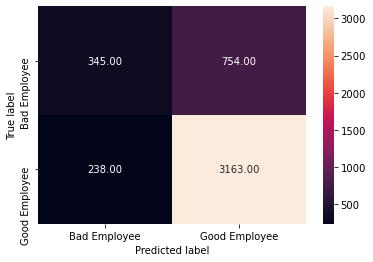

In [36]:
draw_cm( y_test,y_predict)

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predict))
print("Precision:",metrics.precision_score(y_test,y_predict))
print("Recall:",metrics.recall_score(y_test,y_predict))

Accuracy: 0.7795555555555556
Precision: 0.5917667238421955
Recall: 0.31392174704276615


In [40]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual,
                                    probs,
                                    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr, tpr, thresholds

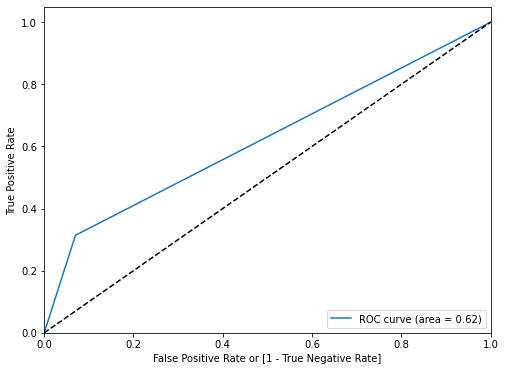

In [41]:
fpr, tpr, thresholds = draw_roc( y_test,y_predict)